In [1]:
import networkx as nx
from networkx.algorithms import approximation
from graphviz import Graph
from random import seed
from random import random, uniform
import itertools
import os
import copy
import pandas as pd
import math
import time

import cv2
from PIL import Image, ImageSequence
from IPython.display import Video, display, HTML


In [2]:
def DFS(graph, node, visited, ret, counter):
    counter = counter + 1
    if node not in visited:
        ret += [node]
        visited.add(node)
        res = [n for n in graph.neighbors(node)]
        res.sort()
        for neighbour in res:
            DFS(graph, neighbour, visited, ret, counter)
    if counter == 1 and len(ret) != len(graph.nodes):
        counter = 0
        nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
        nodes.sort()
        DFS(graph, nodes[0], visited, ret, counter)
        
    return ret

def Island_Check(graph, node, visited, ret, counter):
    counter = counter + 1
    if node not in visited:
        ret += [node]
        visited.add(node)
        res = [n for n in graph.neighbors(node)]
        res.sort()
        for neighbour in res:
            DFS(graph, neighbour, visited, ret, counter)
    if counter == 1 and len(ret) != len(graph.nodes):
        return True
    
    return False


def remove_dups(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def remove_one(seq):
    return [x for x in seq if not (x==1)]

def BFS(graph, node):
    res = [n for n in graph.neighbors(node)]
    res.sort()
    visited = [node]
    ret = [node] + res
    
    for item in res:
        visited.append(item)
    
    while len(ret) != len(graph.nodes):
        res1 = []
        for item in res:
            temp = [n for n in graph.neighbors(item) if n not in visited]
            res1 += temp
            for item in temp:
                visited.append(item)

        if res1:
            res1.sort()
            res = res1
            ret += res
        else:
            nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
            if not nodes:
                break
            nodes.sort()
            ret += [nodes[0]]
            visited.append(nodes[0])
            
            res = [n for n in graph.neighbors(nodes[0])]
            res.sort()
            for item in res:
                visited.append(item)
                
            ret += res

    return ret
    
    
def graph_graph(my_graph, solution, spot=-1, file_name="graph", title="graph", alg="", show=False):
    
    if spot == -1:
        spot = len(solution)
    
    if solution[0] != 1:
        solution = [1] + solution

    to_display = []
    for edge in my_graph.edges:
        to_display += [list(edge)]
    
    f = Graph(title, filename=file_name, format="png")
    f.attr(rankdir='LR', size='10,6')
    f.attr('node', shape='doublecircle', style='filled', fillcolor='red')
    f.node('1')

    
    increment = 1/(len(solution) - 1)
    for i, item in enumerate(solution[1:spot]):
        change = increment * i
        color_value = ".65 " + str(1-change) + " 1"
        f.attr('node', shape='circle', fillcolor=color_value, xlabel=str(i+2))
        f.node(str(item))
        
    if spot != len(solution):
        f.attr('node', shape='circle', fillcolor='red', xlabel=str(spot+1))
        f.node(str(solution[spot]))

        f.attr('node', shape='circle', style='unfilled', xlabel="")
        for i, item in enumerate(solution[spot+1:]):
            f.node(str(item))


    for edge in to_display:
        f.edge(str(edge[0]), str(edge[1]), color="1 0.05 .85")


    if show:
        display(f)
    failed = False
    try:
        f.render()
    except:
        failed = True
    return f, failed


def graph_graph_help(my_graph, solution, spot, file_name, title, alg, show=False):
    
    if spot == -1:
        f, failed = graph_graph(my_graph, solution, 0, file_name, title, alg, show)
        f.render()
        return f

    f, failed = graph_graph(my_graph, solution, spot, file_name, title, alg, show)
    if failed:
        return f, failed

    neighbors = [n for n in my_graph.neighbors(solution[spot]) if n not in solution[:spot]]
    for neighbor in neighbors:
        f.node(str(neighbor), style='filled', fillcolor='yellow')
        
    if spot == 0:
        f.render()
        return f

    island = False
    if len(neighbors) == 0:
        island = True
        solution_rev = solution[:spot]
        solution_rev.reverse()
        for item in solution_rev:
            neighbors = [n for n in my_graph.neighbors(item) if n not in solution[:spot+1]]
            if len(neighbors) > 0:
                island = False
                for neighbor in neighbors:
                    f.node(str(neighbor), style='filled', fillcolor='yellow')
                break

    if island:
        for i in solution[spot+1:]:
            f.node(str(i), style='filled', fillcolor='yellow')


    if show:
        display(f)
    failed = False
    try:
        f.render()
    except:
        failed = True
    return f, failed

def graph_graph_help2(my_graph, solution, spot, file_name, title, alg, show=False):

    f, failed = graph_graph(my_graph, solution, spot, file_name, title, alg, show)
    return failed


def graph_graph_png(my_graph, solution, file_name, title, alg, l, w):

    size = (l, w)
    
    if solution[0] != 1:
        solution = [1] + solution

    file = file_name
    failed = graph_graph_help2(my_graph, solution, len(solution), file, title, alg)
    if not failed:
        file += ".png"
        time.sleep(0.2)
        im = Image.open(file)
        im = im.resize(size , Image.ANTIALIAS)
        time.sleep(0.2)
        im.save(file, format="PNG")
        time.sleep(0.2)
        im.close()

    file = file_name
    os.remove(file)


    return failed


def graph_graph_gif(my_graph, solution, file_name, title, alg, gif_name):

    size = (450, 450)
    
    images = []
    if solution[0] != 1:
        solution = [1] + solution

    for i, item in enumerate(solution):
        file = file_name + str(i) + "n"
        graph_graph_help(my_graph, solution, i-1, file, title, alg)
        file += ".png"
        im = Image.open(file)
        im = im.resize(size , Image.ANTIALIAS)
        images.append(im)
        
        file = file_name + str(i)
        graph_graph(my_graph, solution, i, file, title, alg)
        file += ".png"
        im = Image.open(file)
        im = im.resize(size , Image.ANTIALIAS)
        images.append(im)

    
    images[0].save(gif_name + '.gif',
                   save_all=True, append_images=images[1:], optimize=False, duration=1500, loop=0)
    
    
    for i, item in enumerate(images):
        item.close()
        
    for i in range(int(len(images)/2)):
        file = file_name + str(i) + "n.png"
        os.remove(file)
        file = file_name + str(i) + "n"
        os.remove(file)
        
        file = file_name + str(i) + ".png"
        os.remove(file)
        file = file_name + str(i)
        os.remove(file)


    return

def graph_graph_vid(my_graph, solution, file_name, title, alg, vid_name):
    
    
    size = (450, 450)
    
    files = []
    images = []
    if solution[0] != 1:
        solution = [1] + solution

    for i, item in enumerate(solution):
        file = file_name + str(i) + "n"
        graph_graph_help(my_graph, solution, i-1, file, title, alg)
        file += ".png"
        files.append(file)
        im = Image.open(file)
        im = im.resize(size , Image.ANTIALIAS)
        im.save(file)
        images.append(im)
        
        file = file_name + str(i)
        graph_graph(my_graph, solution, i, file, title, alg)
        file += ".png"
        files.append(file)
        im = Image.open(file)
        im = im.resize(size , Image.ANTIALIAS)
        im.save(file)
        images.append(im)
        
        
        
        
        
    video_name = 'mygeneratedvideo.mp4'

    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 1, size)  

    # Appending the images to the video one by one 
    for file in files:  
        video.write(cv2.imread(file))

    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated
    
    
    
    
    for i, item in enumerate(images):
        item.close()
        
    for i in range(int(len(images)/2)):
        file = file_name + str(i) + "n.png"
        os.remove(file)
        file = file_name + str(i) + "n"
        os.remove(file)
        
        file = file_name + str(i) + ".png"
        os.remove(file)
        file = file_name + str(i)
        os.remove(file)
        
        
    return
    
    
def display_graph(my_graph, file_name, title):
    
    to_display = []
    for edge in my_graph.edges:
        to_display += [list(edge)]
        
    G = Graph(title, filename=file_name + ".gv")
    G.attr(rankdir='LR', size='20,12')
    G.attr('node', shape='doublecircle', style='filled', fillcolor='red')
    G.node('1')
    G.attr('node', shape='circle', style='unfilled')

    for edge in to_display:
        G.edge(str(edge[0]), str(edge[1]), color="1 0.05 .85")


    print()
    print()
    print()
    print("Original Graph")
    display(G)
    #G.view()
    
    
    
my_graph = [[27,2],[1,3],[1,4],[1,5],[3,4],[4,2],[5,2],[4,5],
           [6,2],[20,25],[7,20],[15,17],[16,16],[25,4],[4,7],[3,7]]

G = nx.MultiGraph()
for edge in my_graph:
    G.add_edge(edge[0], edge[1])
    
    
visited = set()
answer = []
sol_dfs = DFS(G, 1, visited, answer, 0)
sol_bfs = BFS(G,1)


In [3]:
#graph_graph(G, sol_dfs, 2, "solution_dfs", "DFS Transversal Sequence", "DFS")
graph_graph_gif(G, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS", "pillow_imagedraw")
graph_graph_vid(G, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS", "pillow_imagedraw")
#graph_graph(G, sol_bfs, 2, "solution_bfs", "BFS Transversal Sequence", "BFS")
print("Done!")

Done!


![SegmentLocal](pillow_imagedraw.gif "segment")

In [4]:
Video("mygeneratedvideo.mp4")

In [3]:
def generate_tree(rseed, nodes, prob_edge, display=False):

    seed(rseed)
    my_graph = []
    used = set()
    for i in range(1, nodes+1):
        for j in range(i+1, nodes+1):
            if uniform(0, 1) <= prob_edge:
                my_graph += [[i, j]]
                used.add(i)
                used.add(j)
            elif j == nodes and i not in used:
                my_graph += [[i, i]]

    
    my_graph = dict((x[0], x) for x in my_graph).values()

    G = nx.MultiGraph()
    for edge in my_graph:
        G.add_edge(edge[0], edge[1])

    if display:
        print(f"Tree Parameters: rseed: {rseed}, count: {count}, connectivity: {connectivity}\n\n")
        print(my_graph)
        display_graph(G, "input graph", "Original")

        visited = set()
        answer = []
        sol_dfs = DFS(G, 1, visited, answer, 0)
        sol_bfs = BFS(G,1)
    
        graph_graph(G, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS")
        graph_graph(G, sol_bfs, "solution_bfs", "BFS Transversal Sequence", "BFS")
        print()
        print("\n\n\n\n\n\n")
    
    return G
    
    
def generate_graph(rseed, nodes, prob_edge, islands=True, display=False):

    seed(rseed)
    island_flag = True
    while island_flag:
        my_graph = []
        used = set()
        island_flag = False
        for i in range(1, nodes+1):
            for j in range(i+1, nodes+1):
                if uniform(0, 1) <= prob_edge:
                    my_graph += [[i, j]]
                    used.add(i)
                    used.add(j)
                elif j == nodes and i not in used:
                    my_graph += [[i, i]]

        if nodes not in used:
            my_graph += [[nodes, nodes]]
                

        G = nx.Graph()
        for edge in my_graph:
            G.add_edge(edge[0], edge[1])
            
        if not islands:
            island_flag = Island_Check(G, 1, set(), [], 0)


    if display:
        print(f"Graph Parameters: rseed: {rseed}, count: {count}, connectivity: {connectivity}\n\n")
        print(my_graph)
        display_graph(G, "input graph", "Original")

        visited = set()
        answer = []
        sol_dfs = DFS(G, 1, visited, answer, 0)
        sol_bfs = BFS(G,1)

        graph_graph(G, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS")
        graph_graph(G, sol_bfs, "solution_bfs", "BFS Transversal Sequence", "BFS")
        print()
        print("\n\n\n\n\n\n")
    
    return G



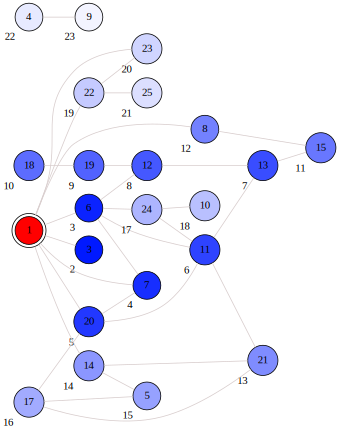

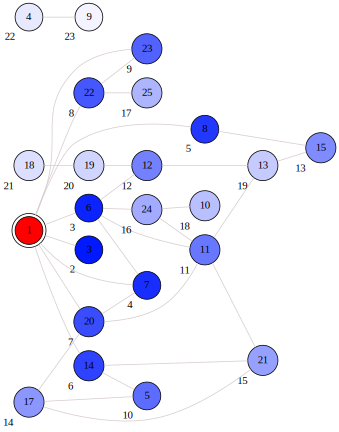

True
[1, 3, 6, 7, 8, 14, 20, 22, 23, 5, 11, 12, 15, 17, 21, 24, 25, 10, 13, 19, 18, 4, 9]


In [5]:
def is_invalid_pattern(list_in, patterns):
    if patterns == []:
        return False

    to_remove = []
    for pattern in patterns:
        if list_in == pattern["max"]:
            to_remove.append(pattern)
        flag = True
        for key, value in pattern.items():
            if key == "key":
                for i in range(1, len(value)):
                    if list_in.index(value[i-1]) > list_in.index(value[i]):
                        flag = False
                        break
                        
                if not flag:
                    break
            elif key != "max":
                #if phantom node precedes the parent that spawned it
                #then the patterns do no match
                if list_in.index(key) < list_in.index(pattern[key][0]):
                    flag = False
                    break
        
        if flag:
            break
        
    for item in to_remove:
        patterns.remove(item)
    return flag

def is_gload_pattern(list_in, patterns):
    if patterns == []:
        return False, [], {}, [], [], {}
    
    ret1 = False
    ret2 = []
    ret3 = {}
    new_graph = []
    new_ret = []
    new_layer_min = {}

    to_remove = []
    last_match = -1
    for i in range(len(patterns)):
        pattern = patterns[i]
        if list_in == pattern["max"]:
            to_remove.append(pattern)
        flag = True
        for key, value in pattern.items():
            if key == "key":
                for j in range(1, len(value)):
                    if list_in.index(value[j-1]) > list_in.index(value[j]):
                        flag = False
                        break
                        
                if not flag:
                    break
            elif not isinstance(key, str):
                #if phantom node precedes the parent that spawned it
                #then the patterns do no match
                if list_in.index(key) < list_in.index(pattern[key][0]):
                    flag = False
                    break
        
        if flag:
            last_match = i
        
    if last_match != -1:
        new_graph = copy.deepcopy(patterns[last_match]["graph"])
        new_ret = copy.deepcopy(patterns[last_match]["ret"])
        new_layer_min = copy.deepcopy(patterns[last_match]["layer_min"])

        ret1 = True
        ret2 = copy.deepcopy(patterns[last_match]["stop_at"])
        ret3 = copy.deepcopy(patterns[last_match]["pattern_reset"])
        
    for item in to_remove:
        patterns.remove(item)

    return ret1, ret2, ret3, new_graph, new_ret, new_layer_min

def cleanup_gload_patterns(list_in, patterns):
    if patterns == []:
        return

    to_remove = []
    for i in range(len(patterns)):
        if list_in == patterns[i]["max"]:
            to_remove.append(patterns[i])
        
    for item in to_remove:
        patterns.remove(item)

    return
            
        
def max_pattern(pattern):
    max_list = []
    for i in range(len(pattern["key"])):
        temp_list = []
        x = pattern["key"][i]
        for key,value in pattern.items():
            if isinstance(key, int) and value[0] == x:
                temp_list.append(key)
        temp_list.remove(x)
        temp_list.sort(reverse=True)
        if i == 0:
            max_list = [x] + temp_list
            continue

        y = pattern["key"][i-1]
        pivot = max_list.index(y) + 1
        max_list1 = max_list[:pivot]
        max_list2 = max_list[pivot:] + [x]
        max_list2.sort(reverse=True)
        max_list = max_list1 + max_list2

        pivot = max_list.index(x) + 1
        max_list1 = max_list[:pivot]
        max_list2 = max_list[pivot:] + temp_list
        max_list2.sort(reverse=True)
        max_list = max_list1 + max_list2
        
        
    return max_list

def DFS_Solver(graph, sol, layer_min, node, parent, starting_node, 
               number_attempts, ret=[]):

    #if node isn't in graph then it's already been used. This happens
    #when branches have shared roots (aka it's part of a cycle) and was
    #already changed
    if node not in graph.nodes:
        return True
    
    number_attempts[0] += 1
    #if number_attempts[0] % 10000000 == 0:
    #    print(f"Attempted: {number_attempts[0]:,}")
    #    print(f"Out of Potentially: {math.factorial(len(sol)-1):,}")
    #    display_graph(graph, "func try", f"node: {node}")

    #get what node value we're trying to assign out
    i = sol[len(ret)]

    #if the value of the node violates the ordering
    #principle then the node fails the test and the
    #node will be marked as not found. This is a major component
    #in the optimization of this algorithm
    if i < layer_min[node]:
        return False

    #once value satisfies the required conditions we
    #update ret and state that a value WAS found. We also
    #update layer_min
    ret.extend([i])
    layer_min[i] = layer_min[node]
    
    #number_attempts stores the FIRST instance of reaching
    #the desired subsequence
    if number_attempts[i] == 0:
        number_attempts[i] = copy.deepcopy(number_attempts[0])
        
    #update graph that maps current node value to the
    #new value  (original graph value  ->  solution graph value)
    #use line directly below for graphs that retain most
    #of their shape if a solution is found
    #graph = nx.relabel_nodes(graph, {node: i})
    nx.relabel_nodes(graph, {node: i}, False)
    #display_graph(graph, "func try", f"node: {node}")


    #calculate and assign the minimum value each
    #node can have in order to not immediately
    #violate ordered DFS
    for neighbor in list(graph.neighbors(parent)):
        layer_min[neighbor] = max(i, layer_min[neighbor])

            
    usable_nodes = [n for n in graph.neighbors(i) if n not in ret]
    usable_nodes.sort()
            
    if len(usable_nodes) == 0 and node != starting_node:
        #reached end of branch or location where no more neighboring
        #nodes are available for mapping. Start backtracking
        return True



    try_flag = True
    skip = True
    if len(usable_nodes) > 1:
        graph_reset = list(graph.edges())
        ret_reset = copy.deepcopy(ret)
        layer_min_reset = copy.deepcopy(layer_min)

    last_permu = copy.deepcopy(usable_nodes)
    last_permu.sort(reverse=True)
        
    invalid_patterns = []
    gload_patterns = []
    permu_generator = itertools.permutations(usable_nodes)


    for permu in permu_generator:
        if not try_flag:
            break
            
        permu = list(permu)
        if is_invalid_pattern(permu, invalid_patterns):
            if permu == last_permu:
                return False
            cleanup_gload_patterns(permu, gload_patterns)
            continue
            
        gloaded, stop_here, pattern, res1, res2, res3 = is_gload_pattern(permu, gload_patterns)
        
        if gloaded and list(graph.edges()) != res1:
            graph.clear()
            for edge in res1:
                graph.add_edge(edge[0], edge[1])
            ret.clear()
            for item in res2:
                ret.append(item)
            for key, value in res3.items():
                layer_min[key] = value
        elif not gloaded and not skip:
            #use in conjunction with code above for
            #more consistent graphs instead of
            #code below commented code
            #graph = copy.deepcopy(graph_reset)
            graph.clear()
            for edge in graph_reset:
                graph.add_edge(edge[0], edge[1])

            del ret[len(ret_reset):]

            for key, value in layer_min_reset.items():
                layer_min[key] = value
                
        skip = False
            
        for k,neighbor in enumerate(permu):

            attempt_compare = number_attempts[0]

            #recursive call. This will only be called
            #when the loop above doesn't fail to
            #find a valid node value and when
            #that node has usable neighbors.
            if not gloaded or neighbor in stop_here:
                found = DFS_Solver(graph, sol, layer_min,
                                   neighbor, i, starting_node,
                                   number_attempts, ret)
                gloaded = False
            else:
                continue


            if not found:
                
                if permu == last_permu:
                    return False


                if neighbor == permu[-1]:
                    del gload_patterns[-1]


                if "key" not in pattern:
                    pattern["key"] = [neighbor]
                else:
                    pattern["key"].append(neighbor)

                pattern[neighbor] = [neighbor]
                for n in [permu[n] for n in range(k+1, len(permu)) if permu[n] not in pattern]:
                    pattern[n] = [neighbor]
                    
                max_patt = max_pattern(pattern)
                if max_patt != permu:
                    pattern["max"] = max_patt
                    invalid_patterns.append(copy.deepcopy(pattern))

                break


            #valid node was returned
            else:
                if neighbor == permu[-1]:
                    if node == 1:
                        try_flag = False
                        break
                    return True


                if attempt_compare != number_attempts[0]:
                    
                    if "key" not in pattern:
                        pattern["key"] = [neighbor]
                    else:
                        pattern["key"].append(neighbor)

                    pattern[neighbor] = [neighbor]
                    #getting all associated phantom nodes
                    for n in [permu[n] for n in range(k+1, len(permu)) if permu[n] not in 
                              set(list(graph.nodes) + list(pattern.keys()))]:
                        pattern[n] = [neighbor]

                    gload_pattern = copy.deepcopy(pattern)
                    stop_at = []
                    for n in [permu[n] for n in range(k+1, len(permu)) if permu[n] not in pattern]:
                        gload_pattern[n] = [neighbor]
                        stop_at.append(n)

                    gload_pattern["max"] = max_pattern(gload_pattern)
                    gload_pattern["graph"] = list(graph.edges())
                    gload_pattern["ret"] = copy.deepcopy(ret)
                    gload_pattern["layer_min"] = copy.deepcopy(layer_min)
                    gload_pattern["stop_at"] = copy.deepcopy(stop_at)
                    gload_pattern["pattern_reset"] = copy.deepcopy(pattern)
                    gload_patterns.append(copy.deepcopy(gload_pattern))


        
    
    #this runs when islands exist in the graph
    if node == starting_node and len(ret) != len(sol):
        print("trying next island?")
        
        usable_nodes = list(set([n for n in graph.nodes]).symmetric_difference(ret))
        usable_nodes.sort()
        for node in usable_nodes:
            layer_min[node] = sol[len(ret)]
            
        for i in sol[len(ret)+1:]:
            if sol[len(ret)] > i:
                print("exiting because of common sense")
                print(f"{sol[len(ret)]} > {i}")
                return False


        skip = True
        if len(usable_nodes) > 1:
            graph_reset = list(graph.edges())
            ret_reset = copy.deepcopy(ret)
            layer_min_reset = copy.deepcopy(layer_min)

        last_permu = copy.deepcopy(usable_nodes)
        last_permu.sort(reverse=True)

        invalid_patterns = []
        gload_patterns = []
        permu_generator = itertools.permutations(usable_nodes)

        for permu in permu_generator:
            permu = list(permu)
            if is_invalid_pattern(permu, invalid_patterns):
                if permu == last_permu:
                    return False
                cleanup_gload_patterns(permu, gload_patterns)
                continue

            gloaded, stop_here, pattern, res1, res2, res3 = is_gload_pattern(permu, gload_patterns)

            if gloaded and list(graph.edges()) != res1:
                graph.clear()
                for edge in res1:
                    graph.add_edge(edge[0], edge[1])
                ret.clear()
                for item in res2:
                    ret.append(item)
                for key, value in res3.items():
                    layer_min[key] = value
            elif not gloaded and not skip:
                #use in conjunction with code above for
                #more consistent graphs instead of
                #code below commented code
                #graph = copy.deepcopy(graph_reset)
                graph.clear()
                for edge in graph_reset:
                    graph.add_edge(edge[0], edge[1])

                del ret[len(ret_reset):]

                for key, value in layer_min_reset.items():
                    layer_min[key] = value

            skip = False
        
            for k,neighbor in enumerate(permu):

                #this unnecessarily loops through all the item in permu even
                #though the graph may have already been solved. This checks for that
                if ret == sol:
                    return True
                
                attempt_compare = number_attempts[0]

                #recursive call. This will only be called
                #when the loop above doesn't fail to
                #find a valid node value and when
                #that node has usable neighbors.
                #here there be dragons
                if not gloaded or neighbor in stop_here:
                    found = DFS_Solver(graph, sol, layer_min,
                                       neighbor, sol[len(ret)],
                                       sol[len(ret)], number_attempts,
                                       ret)
                    gloaded = False
                else:
                    continue


                if not found:

                    if permu == last_permu:
                        return False


                    if neighbor == permu[-1]:
                        del gload_patterns[-1]


                    if "key" not in pattern:
                        pattern["key"] = [neighbor]
                    else:
                        pattern["key"].append(neighbor)

                    pattern[neighbor] = [neighbor]
                    for n in [permu[n] for n in range(k+1, len(permu)) if permu[n] not in pattern]:
                        pattern[n] = [neighbor]

                    max_patt = max_pattern(pattern)
                    if max_patt != permu:
                        pattern["max"] = max_patt
                        invalid_patterns.append(copy.deepcopy(pattern))

                    break


                else:
                    if neighbor == permu[-1]:
                        return True


                    if attempt_compare != number_attempts[0]:

                        if "key" not in pattern:
                            pattern["key"] = [neighbor]
                        else:
                            pattern["key"].append(neighbor)

                        pattern[neighbor] = [neighbor]
                        #getting all associated phantom nodes
                        for n in [permu[n] for n in range(k+1, len(permu)) if permu[n] not in 
                                  set(list(graph.nodes) + list(pattern.keys()))]:
                            pattern[n] = [neighbor]

                        gload_pattern = copy.deepcopy(pattern)
                        stop_at = []
                        for n in [permu[n] for n in range(k+1, len(permu)) if permu[n] not in pattern]:
                            gload_pattern[n] = [neighbor]
                            stop_at.append(n)

                        gload_pattern["max"] = max_pattern(gload_pattern)
                        gload_pattern["graph"] = list(graph.edges())
                        gload_pattern["ret"] = copy.deepcopy(ret)
                        gload_pattern["layer_min"] = copy.deepcopy(layer_min)
                        gload_pattern["stop_at"] = copy.deepcopy(stop_at)
                        gload_pattern["pattern_reset"] = copy.deepcopy(pattern)
                        gload_patterns.append(copy.deepcopy(gload_pattern))


    
    return found




def BFS_Solver(graph, sol):
    res = [n for n in graph.neighbors(1)]
    visited = [1]
    running_total = len(res)
    ret = [1, running_total]
    num_graph_nodes = len(graph.nodes)
    
    for item in res:
        visited.append(item)
    
    while running_total < num_graph_nodes:
        res1 = []
        for item in res:
            temp = [n for n in graph.neighbors(item) if n not in visited]
            res1 += temp
            for item in temp:
                visited.append(item)
                
        if res1:
            res = res1
            ret.append(len(res))
        else:
            nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
            if not nodes:
                break
            ret.append(1)
            running_total += 1
            visited.append(nodes[0])
            
            res = [n for n in graph.neighbors(nodes[0])]
            for item in res:
                visited.append(item)
                
            if res:
                ret.append(len(res))
        
        running_total += len(res)
        
    flag = True
    start = 0
    for item in ret:
        if item == 1:
            start += 1
            continue
        for i in range(1, item):
            if sol[start + i-1] > sol[start + i]:
                flag = False
                break
        if not flag:
            break
        else:
            start += item
    
    return flag




my_graph = [[1, 3], [22, 23], [17, 20], [1, 6], [6, 24], [18, 19], [11, 24], [1, 20], [7, 20], 
            [6, 7], [4, 9], [12, 13], [1, 14], [8, 15], [11, 13], [1, 23], [6, 11], [5, 17], 
            [13, 15], [10, 24], [11, 21], [6, 12], [22, 25], [1, 22], [12, 19], [5, 14], 
            [17, 21], [1, 8], [11, 20], [14, 21], [1, 7]]

G = nx.MultiGraph()
for edge in my_graph:
    G.add_edge(edge[0], edge[1])
    
    
sol_dfs = DFS(G, 1, set(), [], 0)
sol_bfs = BFS(G,1)

graph_graph(G, sol_dfs, len(sol_dfs), "solution_dfs", "DFS Transversal Sequence", "DFS", show=True)
graph_graph(G, sol_bfs, len(sol_bfs), "solution_bfs", "BFS Transversal Sequence", "BFS", show=True)
print(BFS_Solver(G, sol_bfs))
print(sol_bfs)

In [6]:
def DFS_Solver_Testing(my_graph, graph_to_solve, cutoff=0, display=True):
    
    solution = BFS(graph_to_solve, 1)
    layer_min = {1: 1}
    number_attempts = {0: 0, 1: 0}
    

    my_max = 0
    for item in my_graph:
        my_max = max([my_max] + item)


    for count, item in enumerate(my_graph):
        if item[0] != 1:
            layer_min[item[0]] = 1
            number_attempts[item[0]] = 0

            # + my_max changes the value of item[0]...
            my_graph[count][0] = item[0] + my_max

            layer_min[item[0]] = 1

        if item[1] != 1:
            layer_min[item[1]] = 1
            number_attempts[item[1]] = 0

            my_graph[count][1] = item[1] + my_max

            layer_min[item[1]] = 1


    G = nx.MultiGraph()
    for edge in my_graph:
        G.add_edge(edge[0], edge[1])

    if display:
        display_graph(graph_to_solve, "first try", "title")
        graph_graph(graph_to_solve, solution, len(solution), "solution_bfs", "BFS Transversal Sequence", "BFS", True)
        
    cutoff_flag = False
    if cutoff > 0 and cutoff < len(solution):
        cutoff_flag = True
        solution = solution[0:cutoff]
        
    if display:
        print(solution)

    found = DFS_Solver(G, solution, layer_min,
                       1, 1, 1, number_attempts, [])
    

    visited = set()
    answer = []
    result_dfs = DFS(G, 1, visited, answer, 0)
    result_dfs_trimmed = result_dfs
    if cutoff_flag:
        result_dfs_trimmed = result_dfs[0:(cutoff-1)]
        

    if solution == result_dfs_trimmed:
        if display:
            print("Hurray! Solution is correct")
            print(f"Solution took {number_attempts[0]} attempts!")
            graph_graph(G, result_dfs, len(solution), 
                        "solution_dfs", "DFS Transversal Sequence", "DFS", True)
    else:
        if display:
            print("Solution is NOT correct!")
        found = False

    return found, G, solution, number_attempts






Original Graph


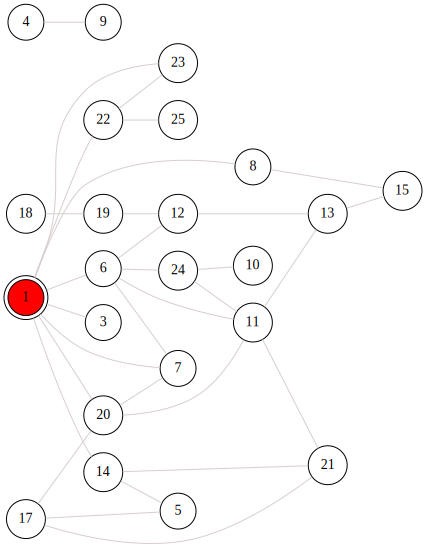

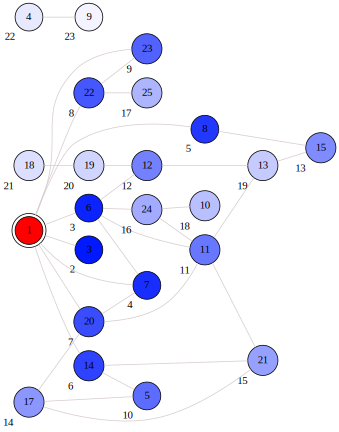

[1, 3, 6, 7, 8, 14, 20, 22, 23, 5, 11, 12, 15, 17, 21, 24, 25, 10, 13, 19, 18, 4, 9]
trying next island?
Hurray! Solution is correct
Solution took 85 attempts!


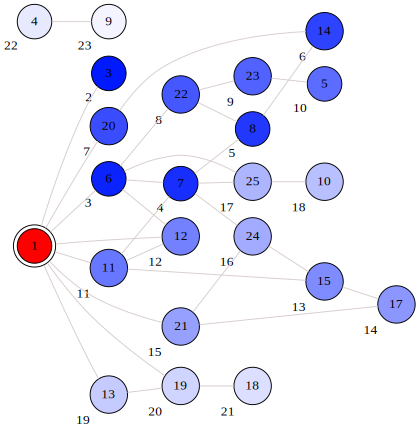

In [7]:
my_graph = [[1, 3], [22, 23], [17, 20], [1, 6], [6, 24], [18, 19], [11, 24], [1, 20], [7, 20], 
            [6, 7], [4, 9], [12, 13], [1, 14], [8, 15], [11, 13], [1, 23], [6, 11], [5, 17], 
            [13, 15], [10, 24], [11, 21], [6, 12], [22, 25], [1, 22], [12, 19], [5, 14], 
            [17, 21], [1, 8], [11, 20], [14, 21], [1, 7]]


    
G_BFS = nx.MultiGraph()
for edge in my_graph:
    G_BFS.add_edge(edge[0], edge[1])
    

found, dfs_from_bfs_graph, solution, number_attempts = DFS_Solver_Testing(my_graph, G_BFS, 0, True)

![SegmentLocal](ultimate.gif "segment")